## Figure 13 (Journal of Climate submission; Molina et al.)

Fig.13. DJF Pacific meridional streamfunction (Sv; 106m3s−1) to a depth of approximately 900 meters during(b) all years, (c) El Niño (ONI≥+0.5), and (i) La Niña (ONI≤-0.5) shown for the CESM1 control. Pacificmeridional streamfunction during El Niño and La Niña are also shown for the sensitivity experiments (d-h, i-n).Time periods considered are the same as in Fig. 2. Pacific meridional streamfunction for the CESM1 controlduring all months and years (a) also shown for comparison.

**Figure by: Maria J. Molina, NCAR**

In [1]:
# imports 

import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from climatico import enso
import cftime 

In [10]:
from config import directory_figs, directory_data

In [3]:
TVTS_cntrl = 'TVTS_b.e11.B1850C5CN.f09_g16.005.pop.h.*.mon.nc'
ds_ = xr.open_mfdataset(f'{directory_data}{TVTS_cntrl}',
                        combine='by_coords')

In [4]:
# all mean
ds1 = ds_['pmsf'].sel(time=slice(cftime.DatetimeNoLeap(800, 1, 1),cftime.DatetimeNoLeap(1599, 12, 1))).mean('time',skipna=True)
# DJF mean
ds2 = ds_.resample(time='QS-DEC').mean(skipna=True)
ds2 = ds2['pmsf'][ds2['time.month']==12]
ds2 = ds2[(ds2['time.year']>=800)&(ds2['time.year']<=1599)]

In [5]:
ds_nino = xr.open_dataset(f'{directory_data}ensopmsf_ninodata.nc')
ds_nina = xr.open_dataset(f'{directory_data}ensopmsf_ninadata.nc')

In [6]:
levs = ds_nino.sel(lat=slice(-30,30), lev=slice(0,1000)).coords['lev']
lats = ds_nino.sel(lat=slice(-30,30), lev=slice(0,1000)).coords['lat']

In [7]:
cntrl_nino = ds_nino['cntrl_nino'].sel(lat=slice(-30,30), lev=slice(0,1000))
g02sv_nino = ds_nino['g02sv_nino'].sel(lat=slice(-30,30), lev=slice(0,1000))
g04sv_nino = ds_nino['g04sv_nino'].sel(lat=slice(-30,30), lev=slice(0,1000))
p02sv_nino = ds_nino['p02sv_nino'].sel(lat=slice(-30,30), lev=slice(0,1000))
p04sv_nino = ds_nino['p04sv_nino'].sel(lat=slice(-30,30), lev=slice(0,1000))
psalt_nino = ds_nino['psalt_nino'].sel(lat=slice(-30,30), lev=slice(0,1000))

cntrl_nina = ds_nina['cntrl_nina'].sel(lat=slice(-30,30), lev=slice(0,1000))
g02sv_nina = ds_nina['g02sv_nina'].sel(lat=slice(-30,30), lev=slice(0,1000))
g04sv_nina = ds_nina['g04sv_nina'].sel(lat=slice(-30,30), lev=slice(0,1000))
p02sv_nina = ds_nina['p02sv_nina'].sel(lat=slice(-30,30), lev=slice(0,1000))
p04sv_nina = ds_nina['p04sv_nina'].sel(lat=slice(-30,30), lev=slice(0,1000))
psalt_nina = ds_nina['psalt_nina'].sel(lat=slice(-30,30), lev=slice(0,1000))

/glade/work/molina/miniconda3/envs/python-tutorial/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/glade/work/molina/miniconda3/envs/python-tutorial/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


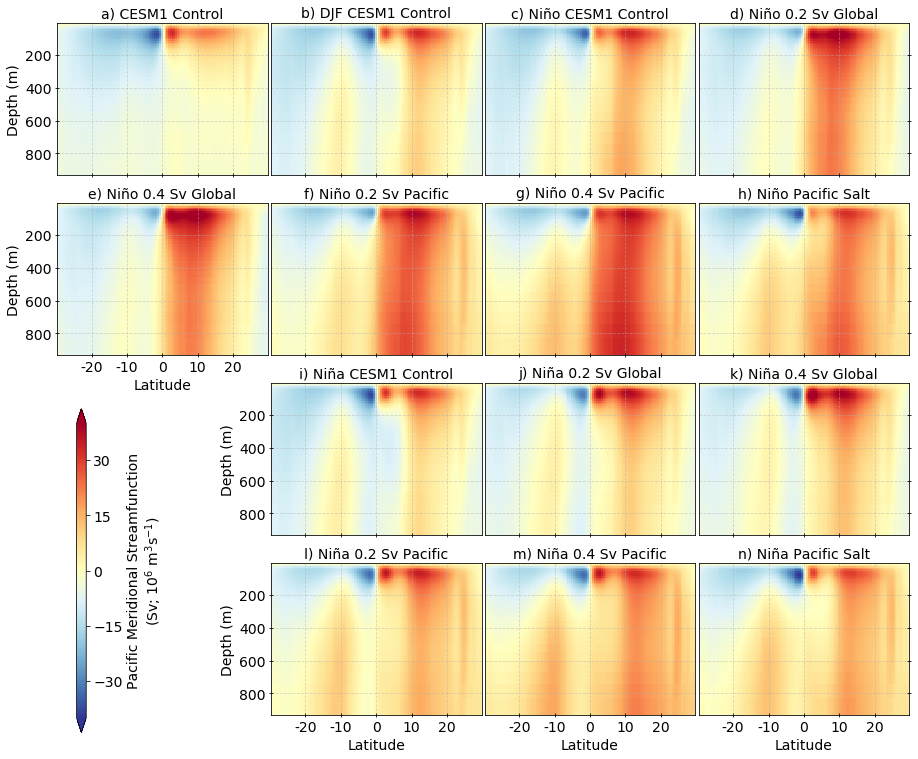

In [11]:
# --------------

a = u"\u00b0"
fig = plt.figure(figsize=(9,10))
#fig.suptitle(u'DJF El Niño (ONI$\geq$+0.5) and La Niña Events (ONI$\leq$-0.5)', x=0.5, y=1.02, fontsize=14)


# --------------

ax0 = plt.axes([-0.33, 0.75, 0.325, 0.21])

ax0.set_title('a) CESM1 Control', fontsize=14)

ax0.pcolormesh(lats, levs, ds1.sel(lat=slice(-30,30),lev=slice(0,1000)).values, cmap='RdYlBu_r', vmin=-40., vmax=40., shading='auto')

ax0.set_yticks([0,200,400,600,800,1000])
ax0.set_yticklabels([0,200,400,600,800,1000], fontsize=14)
ax0.set_xticks([-20,-10,0,10,20])
ax0.set_xticklabels([-20,-10,0,10,20], fontsize=14)

ax0.tick_params(axis='both', labelleft=True, left=True, right=False, labelright=False, 
                direction='inout', labelbottom=False, bottom=True)

plt.ylim(levs.max(), levs.min())
plt.xlim(lats.min(), lats.max())

ax0.grid(alpha=0.5, ls='--')
ax0.set_ylabel('Depth (m)', fontsize=14)
#ax0.set_xlabel(u'Latitude', fontsize=14)

# --------------

ax1 = plt.axes([0., 0.75, 0.325, 0.21])

#ax1.set_title('b) Niño CESM1 Control', fontsize=14)
ax1.set_title('b) DJF CESM1 Control', fontsize=14)

ax1.pcolormesh(lats, levs, ds2.sel(lat=slice(-30,30),lev=slice(0,1000)).mean(dim='time',skipna=True).values, 
               cmap='RdYlBu_r', vmin=-40., vmax=40., shading='auto')

#cs1 = ax1.pcolormesh(lats, levs, cntrl_nino.values, cmap='RdYlBu_r', vmin=-40., vmax=40., shading='auto')

ax1.set_yticks([0,200,400,600,800,1000])
ax1.set_yticklabels([0,200,400,600,800,1000], fontsize=14)
ax1.set_xticks([-20,-10,0,10,20])
ax1.set_xticklabels([-20,-10,0,10,20], fontsize=14)

ax1.tick_params(axis='both', labelleft=False, left=False, right=False, labelright=False, 
                direction='inout', labelbottom=False, bottom=True)

plt.ylim(levs.max(), levs.min())
plt.xlim(lats.min(), lats.max())

ax1.grid(alpha=0.5, ls='--')

# --------------

ax2 = plt.axes([0.33, 0.75, 0.325, 0.21])

ax2.set_title('c) Niño CESM1 Control', fontsize=14)
#ax2.set_title('c) Niño 0.2 Sv Global', fontsize=14)

cs1 = ax2.pcolormesh(lats, levs, cntrl_nino.values, cmap='RdYlBu_r', vmin=-40., vmax=40., shading='auto')
#ax2.pcolormesh(lats, levs, g02sv_nino.values, cmap='RdYlBu_r', vmin=-40., vmax=40., shading='auto')

ax2.set_yticks([0,200,400,600,800,1000])
ax2.set_yticklabels([0,200,400,600,800,1000], fontsize=14)
ax2.set_xticks([-20,-10,0,10,20])
ax2.set_xticklabels([-20,-10,0,10,20], fontsize=14)

ax2.tick_params(axis='both', labelleft=False, left=False, right=False, labelright=False, 
                direction='inout', labelbottom=False, bottom=True)

plt.ylim(levs.max(), levs.min())
plt.xlim(lats.min(), lats.max())

ax2.grid(alpha=0.5, ls='--')

# --------------

ax3 = plt.axes([0.66, 0.75, 0.325, 0.21])

ax3.set_title('d) Niño 0.2 Sv Global', fontsize=14)

ax3.pcolormesh(lats, levs, g02sv_nino.values, cmap='RdYlBu_r', vmin=-40., vmax=40., shading='auto')
#ax3.pcolormesh(lats, levs, g04sv_nino.values, cmap='RdYlBu_r', vmin=-40., vmax=40., shading='auto')

ax3.set_yticks([0,200,400,600,800,1000])
ax3.set_yticklabels([0,200,400,600,800,1000], fontsize=14)
ax3.set_xticks([-20,-10,0,10,20])
ax3.set_xticklabels([-20,-10,0,10,20], fontsize=14)

ax3.tick_params(axis='both', labelleft=False, left=False, right=True, labelright=False, 
                direction='inout', labelbottom=False, bottom=True)

plt.ylim(levs.max(), levs.min())
plt.xlim(lats.min(), lats.max())

ax3.grid(alpha=0.5, ls='--')

# --------------

ax00 = plt.axes([-0.33, 0.5, 0.325, 0.21])

ax00.set_title('e) Niño 0.4 Sv Global', fontsize=14)
#ax00.set_title('e) CESM1 Control', fontsize=14)

ax00.pcolormesh(lats, levs, g04sv_nino.values, cmap='RdYlBu_r', vmin=-40., vmax=40., shading='auto')
#ax00.pcolormesh(lats, levs, ds1.sel(lat=slice(-30,30),lev=slice(0,1000)).values, cmap='RdYlBu_r', vmin=-40., vmax=40., shading='auto')

ax00.set_yticks([0,200,400,600,800,1000])
ax00.set_yticklabels([0,200,400,600,800,1000], fontsize=14)
ax00.set_xticks([-20,-10,0,10,20])
ax00.set_xticklabels([-20,-10,0,10,20], fontsize=14)

ax00.tick_params(axis='both', labelleft=True, left=True, right=False, labelright=False, 
                direction='inout', labelbottom=True, bottom=True)

plt.ylim(levs.max(), levs.min())
plt.xlim(lats.min(), lats.max())

ax00.grid(alpha=0.5, ls='--')
ax00.set_ylabel('Depth (m)', fontsize=14)
ax00.set_xlabel(u'Latitude', fontsize=14)

# --------------

ax4 = plt.axes([0., 0.5, 0.325, 0.21])

ax4.set_title('f) Niño 0.2 Sv Pacific', fontsize=14)

ax4.pcolormesh(lats, levs, p02sv_nino.values, cmap='RdYlBu_r', vmin=-40., vmax=40., shading='auto')

ax4.set_yticks([0,200,400,600,800,1000])
ax4.set_yticklabels([0,200,400,600,800,1000], fontsize=14)
ax4.set_xticks([-20,-10,0,10,20])
ax4.set_xticklabels([-20,-10,0,10,20], fontsize=14)

ax4.tick_params(axis='both', labelleft=False, left=False, right=False, labelright=False, 
                direction='inout', labelbottom=False, bottom=True)

plt.ylim(levs.max(), levs.min())
plt.xlim(lats.min(), lats.max())

ax4.grid(alpha=0.5, ls='--')
#ax4.set_ylabel('Depth (m)', fontsize=14)

# --------------

ax5 = plt.axes([0.33, 0.5, 0.325, 0.21])

ax5.set_title('g) Niño 0.4 Sv Pacific', fontsize=14)

ax5.pcolormesh(lats, levs, p04sv_nino.values, cmap='RdYlBu_r', vmin=-40., vmax=40., shading='auto')

ax5.set_yticks([0,200,400,600,800,1000])
ax5.set_yticklabels([0,200,400,600,800,1000], fontsize=14)
ax5.set_xticks([-20,-10,0,10,20])
ax5.set_xticklabels([-20,-10,0,10,20], fontsize=14)

ax5.tick_params(axis='both', labelleft=False, left=False, right=False, labelright=False, 
                direction='inout', labelbottom=False, bottom=True)

plt.ylim(levs.max(), levs.min())
plt.xlim(lats.min(), lats.max())

ax5.grid(alpha=0.5, ls='--')

# --------------

ax6 = plt.axes([0.66, 0.5, 0.325, 0.21])

ax6.set_title('h) Niño Pacific Salt', fontsize=14)

ax6.pcolormesh(lats, levs, psalt_nino.values, cmap='RdYlBu_r', vmin=-40., vmax=40., shading='auto')

ax6.set_yticks([0,200,400,600,800,1000])
ax6.set_yticklabels([0,200,400,600,800,1000], fontsize=14)
ax6.set_xticks([-20,-10,0,10,20])
ax6.set_xticklabels([-20,-10,0,10,20], fontsize=14)

ax6.tick_params(axis='both', labelleft=False, left=False, right=True, labelright=False, 
                direction='inout', labelbottom=False, bottom=True)

plt.ylim(levs.max(), levs.min())
plt.xlim(lats.min(), lats.max())

ax6.grid(alpha=0.5, ls='--')

# --------------

ax7 = plt.axes([0., 0.25, 0.325, 0.21])

ax7.set_title('i) Niña CESM1 Control', fontsize=14)

ax7.pcolormesh(lats, levs, cntrl_nina.values, cmap='RdYlBu_r', vmin=-40., vmax=40., shading='auto')

ax7.set_yticks([0,200,400,600,800,1000])
ax7.set_yticklabels([0,200,400,600,800,1000], fontsize=14)
ax7.set_xticks([-20,-10,0,10,20])
ax7.set_xticklabels([-20,-10,0,10,20], fontsize=14)

ax7.tick_params(axis='both', labelleft=True, left=True, right=False, labelright=False, 
                direction='inout', labelbottom=False, bottom=True)

plt.ylim(levs.max(), levs.min())
plt.xlim(lats.min(), lats.max())

ax7.grid(alpha=0.5, ls='--')
ax7.set_ylabel('Depth (m)', fontsize=14)

# --------------

ax8 = plt.axes([0.33, 0.25, 0.325, 0.21])

ax8.set_title('j) Niña 0.2 Sv Global', fontsize=14)

ax8.pcolormesh(lats, levs, g02sv_nina.values, cmap='RdYlBu_r', vmin=-40., vmax=40., shading='auto')

ax8.set_yticks([0,200,400,600,800,1000])
ax8.set_yticklabels([0,200,400,600,800,1000], fontsize=14)
ax8.set_xticks([-20,-10,0,10,20])
ax8.set_xticklabels([-20,-10,0,10,20], fontsize=14)

ax8.tick_params(axis='both', labelleft=False, left=False, right=False, labelright=False, 
                direction='inout', labelbottom=False, bottom=True)

plt.ylim(levs.max(), levs.min())
plt.xlim(lats.min(), lats.max())

ax8.grid(alpha=0.5, ls='--')

# --------------

ax9 = plt.axes([0.66, 0.25, 0.325, 0.21])

ax9.set_title('k) Niña 0.4 Sv Global', fontsize=14)

ax9.pcolormesh(lats, levs, g04sv_nina.values, cmap='RdYlBu_r', vmin=-40., vmax=40., shading='auto')

ax9.set_yticks([0,200,400,600,800,1000])
ax9.set_yticklabels([0,200,400,600,800,1000], fontsize=14)
ax9.set_xticks([-20,-10,0,10,20])
ax9.set_xticklabels([-20,-10,0,10,20], fontsize=14)

ax9.tick_params(axis='both', labelleft=False, left=False, right=True, labelright=False, 
                direction='inout', labelbottom=False, bottom=True)

plt.ylim(levs.max(), levs.min())
plt.xlim(lats.min(), lats.max())

ax9.grid(alpha=0.5, ls='--')

# --------------

ax10 = plt.axes([0., 0., 0.325, 0.21])

ax10.set_title('l) Niña 0.2 Sv Pacific', fontsize=14)

ax10.pcolormesh(lats, levs, p02sv_nina.values, cmap='RdYlBu_r', vmin=-40., vmax=40., shading='auto')

ax10.set_yticks([0,200,400,600,800,1000])
ax10.set_yticklabels([0,200,400,600,800,1000], fontsize=14)
ax10.set_xticks([-20,-10,0,10,20])
ax10.set_xticklabels([-20,-10,0,10,20], fontsize=14)

ax10.tick_params(axis='both', labelleft=True, left=True, right=False, labelright=False, 
                direction='inout', labelbottom=True, bottom=True)

plt.ylim(levs.max(), levs.min())
plt.xlim(lats.min(), lats.max())

ax10.grid(alpha=0.5, ls='--')
ax10.set_ylabel('Depth (m)', fontsize=14)
ax10.set_xlabel(u'Latitude', fontsize=14)

# --------------

ax11 = plt.axes([0.33, 0., 0.325, 0.21])

ax11.set_title('m) Niña 0.4 Sv Pacific', fontsize=14)

ax11.pcolormesh(lats, levs, p04sv_nina.values, cmap='RdYlBu_r', vmin=-40., vmax=40., shading='auto')

ax11.set_yticks([0,200,400,600,800,1000])
ax11.set_yticklabels([0,200,400,600,800,1000], fontsize=14)
ax11.set_xticks([-20,-10,0,10,20])
ax11.set_xticklabels([-20,-10,0,10,20], fontsize=14)

ax11.tick_params(axis='both', labelleft=False, left=False, right=False, labelright=False, 
                direction='inout', labelbottom=True, bottom=True)

plt.ylim(levs.max(), levs.min())
plt.xlim(lats.min(), lats.max())

ax11.grid(alpha=0.5, ls='--')
ax11.set_xlabel(u'Latitude', fontsize=14)

# --------------

ax12 = plt.axes([0.66, 0., 0.325, 0.21])

ax12.set_title('n) Niña Pacific Salt', fontsize=14)

ax12.pcolormesh(lats, levs, psalt_nina.values, cmap='RdYlBu_r', vmin=-40., vmax=40., shading='auto')

ax12.set_yticks([0,200,400,600,800,1000])
ax12.set_yticklabels([0,200,400,600,800,1000], fontsize=14)
ax12.set_xticks([-20,-10,0,10,20])
ax12.set_xticklabels([-20,-10,0,10,20], fontsize=14)

ax12.tick_params(axis='both', labelleft=False, left=False, right=True, labelright=False, 
                direction='inout', labelbottom=True, bottom=True)

plt.ylim(levs.max(), levs.min())
plt.xlim(lats.min(), lats.max())

ax12.grid(alpha=0.5, ls='--')
ax12.set_xlabel(u'Latitude', fontsize=14)

# --------------

a = u"\u00b0"
cbar_ax = fig.add_axes([-0.30, -0.025, 0.015, 0.45])
ticks_1 = [-30,-15,0,15,30]
cbar = fig.colorbar(cs1, cax=cbar_ax, ticks=ticks_1[:], 
                    orientation='vertical', extend='both')
cbar.set_label('Pacific Meridional Streamfunction\n(Sv; 10$^6$ m$^3$s$^{-1}$)', fontsize=14)
cbar.ax.tick_params(labelsize=14) 

# --------------

plt.savefig(f'{directory_figs}amocenso_fig13.png', bbox_inches='tight', dpi=200)
plt.show()

# --------------

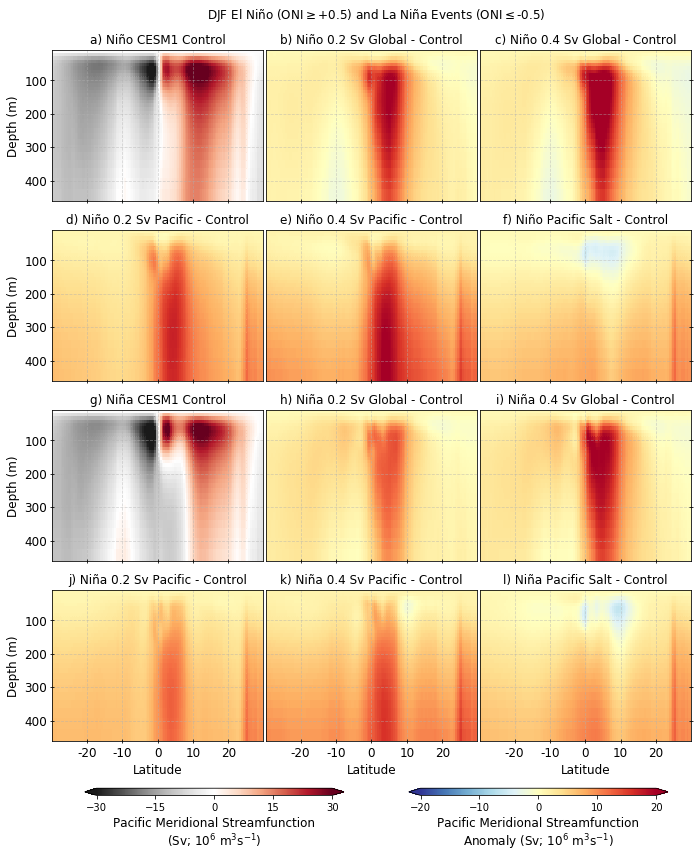

In [6]:
# --------------
"""
a = u"\u00b0"
fig = plt.figure(figsize=(9,10))
fig.suptitle(u'DJF El Niño (ONI$\geq$+0.5) and La Niña Events (ONI$\leq$-0.5)', x=0.5, y=1.02, fontsize=12)

# --------------

ax1 = plt.axes([0., 0.75, 0.325, 0.21])

ax1.set_title('a) Niño CESM1 Control', fontsize=12)

cs1 = ax1.pcolormesh(lats, levs, cntrl_nino.values, cmap='RdGy_r', vmin=-30., vmax=30., shading='auto')

ax1.set_yticks([0,100,200,300,400,500])
ax1.set_yticklabels([0,100,200,300,400,500], fontsize=12)
ax1.set_xticks([-20,-10,0,10,20])
ax1.set_xticklabels([-20,-10,0,10,20], fontsize=12)

ax1.tick_params(axis='both', labelleft=True, left=True, right=False, labelright=False, 
                direction='inout', labelbottom=False, bottom=True)

plt.ylim(levs.max(), levs.min())
plt.xlim(lats.min(), lats.max())

ax1.grid(alpha=0.5, ls='--')
ax1.set_ylabel('Depth (m)', fontsize=12)

# --------------

ax2 = plt.axes([0.33, 0.75, 0.325, 0.21])

ax2.set_title('b) Niño 0.2 Sv Global - Control', fontsize=12)

cs2 = ax2.pcolormesh(lats, levs, g02sv_nino.values-cntrl_nino.values, cmap='RdYlBu_r', vmin=-20., vmax=20., shading='auto')

ax2.set_yticks([0,100,200,300,400,500])
ax2.set_yticklabels([0,100,200,300,400,500], fontsize=12)
ax2.set_xticks([-20,-10,0,10,20])
ax2.set_xticklabels([-20,-10,0,10,20], fontsize=12)

ax2.tick_params(axis='both', labelleft=False, left=False, right=False, labelright=False, 
                direction='inout', labelbottom=False, bottom=True)

plt.ylim(levs.max(), levs.min())
plt.xlim(lats.min(), lats.max())

ax2.grid(alpha=0.5, ls='--')

# --------------

ax3 = plt.axes([0.66, 0.75, 0.325, 0.21])

ax3.set_title('c) Niño 0.4 Sv Global - Control', fontsize=12)

ax3.pcolormesh(lats, levs, g04sv_nino.values-cntrl_nino.values, cmap='RdYlBu_r', vmin=-20., vmax=20., shading='auto')

ax3.set_yticks([0,100,200,300,400,500])
ax3.set_yticklabels([0,100,200,300,400,500], fontsize=12)
ax3.set_xticks([-20,-10,0,10,20])
ax3.set_xticklabels([-20,-10,0,10,20], fontsize=12)

ax3.tick_params(axis='both', labelleft=False, left=False, right=True, labelright=False, 
                direction='inout', labelbottom=False, bottom=True)

plt.ylim(levs.max(), levs.min())
plt.xlim(lats.min(), lats.max())

ax3.grid(alpha=0.5, ls='--')

# --------------

ax4 = plt.axes([0., 0.5, 0.325, 0.21])

ax4.set_title('d) Niño 0.2 Sv Pacific - Control', fontsize=12)

ax4.pcolormesh(lats, levs, p02sv_nino.values-cntrl_nino.values, cmap='RdYlBu_r', vmin=-20., vmax=20., shading='auto')

ax4.set_yticks([0,100,200,300,400,500])
ax4.set_yticklabels([0,100,200,300,400,500], fontsize=12)
ax4.set_xticks([-20,-10,0,10,20])
ax4.set_xticklabels([-20,-10,0,10,20], fontsize=12)

ax4.tick_params(axis='both', labelleft=True, left=True, right=False, labelright=False, 
                direction='inout', labelbottom=False, bottom=True)

plt.ylim(levs.max(), levs.min())
plt.xlim(lats.min(), lats.max())

ax4.grid(alpha=0.5, ls='--')
ax4.set_ylabel('Depth (m)', fontsize=12)

# --------------

ax5 = plt.axes([0.33, 0.5, 0.325, 0.21])

ax5.set_title('e) Niño 0.4 Sv Pacific - Control', fontsize=12)

ax5.pcolormesh(lats, levs, p04sv_nino.values-cntrl_nino.values, cmap='RdYlBu_r', vmin=-20., vmax=20., shading='auto')

ax5.set_yticks([0,100,200,300,400,500])
ax5.set_yticklabels([0,100,200,300,400,500], fontsize=12)
ax5.set_xticks([-20,-10,0,10,20])
ax5.set_xticklabels([-20,-10,0,10,20], fontsize=12)

ax5.tick_params(axis='both', labelleft=False, left=False, right=False, labelright=False, 
                direction='inout', labelbottom=False, bottom=True)

plt.ylim(levs.max(), levs.min())
plt.xlim(lats.min(), lats.max())

ax5.grid(alpha=0.5, ls='--')

# --------------

ax6 = plt.axes([0.66, 0.5, 0.325, 0.21])

ax6.set_title('f) Niño Pacific Salt - Control', fontsize=12)

ax6.pcolormesh(lats, levs, psalt_nino.values-cntrl_nino.values, cmap='RdYlBu_r', vmin=-20., vmax=20., shading='auto')

ax6.set_yticks([0,100,200,300,400,500])
ax6.set_yticklabels([0,100,200,300,400,500], fontsize=12)
ax6.set_xticks([-20,-10,0,10,20])
ax6.set_xticklabels([-20,-10,0,10,20], fontsize=12)

ax6.tick_params(axis='both', labelleft=False, left=False, right=True, labelright=False, 
                direction='inout', labelbottom=False, bottom=True)

plt.ylim(levs.max(), levs.min())
plt.xlim(lats.min(), lats.max())

ax6.grid(alpha=0.5, ls='--')

# --------------

ax7 = plt.axes([0., 0.25, 0.325, 0.21])

ax7.set_title('g) Niña CESM1 Control', fontsize=12)

ax7.pcolormesh(lats, levs, cntrl_nina.values, cmap='RdGy_r', vmin=-30., vmax=30., shading='auto')

ax7.set_yticks([0,100,200,300,400,500])
ax7.set_yticklabels([0,100,200,300,400,500], fontsize=12)
ax7.set_xticks([-20,-10,0,10,20])
ax7.set_xticklabels([-20,-10,0,10,20], fontsize=12)

ax7.tick_params(axis='both', labelleft=True, left=True, right=False, labelright=False, 
                direction='inout', labelbottom=False, bottom=True)

plt.ylim(levs.max(), levs.min())
plt.xlim(lats.min(), lats.max())

ax7.grid(alpha=0.5, ls='--')
ax7.set_ylabel('Depth (m)', fontsize=12)

# --------------

ax8 = plt.axes([0.33, 0.25, 0.325, 0.21])

ax8.set_title('h) Niña 0.2 Sv Global - Control', fontsize=12)

ax8.pcolormesh(lats, levs, g02sv_nina.values-cntrl_nina.values, cmap='RdYlBu_r', vmin=-20., vmax=20., shading='auto')

ax8.set_yticks([0,100,200,300,400,500])
ax8.set_yticklabels([0,100,200,300,400,500], fontsize=12)
ax8.set_xticks([-20,-10,0,10,20])
ax8.set_xticklabels([-20,-10,0,10,20], fontsize=12)

ax8.tick_params(axis='both', labelleft=False, left=False, right=False, labelright=False, 
                direction='inout', labelbottom=False, bottom=True)

plt.ylim(levs.max(), levs.min())
plt.xlim(lats.min(), lats.max())

ax8.grid(alpha=0.5, ls='--')

# --------------

ax9 = plt.axes([0.66, 0.25, 0.325, 0.21])

ax9.set_title('i) Niña 0.4 Sv Global - Control', fontsize=12)

ax9.pcolormesh(lats, levs, g04sv_nina.values-cntrl_nina.values, cmap='RdYlBu_r', vmin=-20., vmax=20., shading='auto')

ax9.set_yticks([0,100,200,300,400,500])
ax9.set_yticklabels([0,100,200,300,400,500], fontsize=12)
ax9.set_xticks([-20,-10,0,10,20])
ax9.set_xticklabels([-20,-10,0,10,20], fontsize=12)

ax9.tick_params(axis='both', labelleft=False, left=False, right=True, labelright=False, 
                direction='inout', labelbottom=False, bottom=True)

plt.ylim(levs.max(), levs.min())
plt.xlim(lats.min(), lats.max())

ax9.grid(alpha=0.5, ls='--')

# --------------

ax10 = plt.axes([0., 0., 0.325, 0.21])

ax10.set_title('j) Niña 0.2 Sv Pacific - Control', fontsize=12)

ax10.pcolormesh(lats, levs, p02sv_nina.values-cntrl_nina.values, cmap='RdYlBu_r', vmin=-20., vmax=20., shading='auto')

ax10.set_yticks([0,100,200,300,400,500])
ax10.set_yticklabels([0,100,200,300,400,500], fontsize=12)
ax10.set_xticks([-20,-10,0,10,20])
ax10.set_xticklabels([-20,-10,0,10,20], fontsize=12)

ax10.tick_params(axis='both', labelleft=True, left=True, right=False, labelright=False, 
                direction='inout', labelbottom=True, bottom=True)

plt.ylim(levs.max(), levs.min())
plt.xlim(lats.min(), lats.max())

ax10.grid(alpha=0.5, ls='--')
ax10.set_ylabel('Depth (m)', fontsize=12)
ax10.set_xlabel(u'Latitude', fontsize=12)

# --------------

ax11 = plt.axes([0.33, 0., 0.325, 0.21])

ax11.set_title('k) Niña 0.4 Sv Pacific - Control', fontsize=12)

ax11.pcolormesh(lats, levs, p04sv_nina.values-cntrl_nina.values, cmap='RdYlBu_r', vmin=-20., vmax=20., shading='auto')

ax11.set_yticks([0,100,200,300,400,500])
ax11.set_yticklabels([0,100,200,300,400,500], fontsize=12)
ax11.set_xticks([-20,-10,0,10,20])
ax11.set_xticklabels([-20,-10,0,10,20], fontsize=12)

ax11.tick_params(axis='both', labelleft=False, left=False, right=False, labelright=False, 
                direction='inout', labelbottom=True, bottom=True)

plt.ylim(levs.max(), levs.min())
plt.xlim(lats.min(), lats.max())

ax11.grid(alpha=0.5, ls='--')
ax11.set_xlabel(u'Latitude', fontsize=12)

# --------------

ax12 = plt.axes([0.66, 0., 0.325, 0.21])

ax12.set_title('l) Niña Pacific Salt - Control', fontsize=12)

ax12.pcolormesh(lats, levs, psalt_nina.values-cntrl_nina.values, cmap='RdYlBu_r', vmin=-20., vmax=20., shading='auto')

ax12.set_yticks([0,100,200,300,400,500])
ax12.set_yticklabels([0,100,200,300,400,500], fontsize=12)
ax12.set_xticks([-20,-10,0,10,20])
ax12.set_xticklabels([-20,-10,0,10,20], fontsize=12)

ax12.tick_params(axis='both', labelleft=False, left=False, right=True, labelright=False, 
                direction='inout', labelbottom=True, bottom=True)

plt.ylim(levs.max(), levs.min())
plt.xlim(lats.min(), lats.max())

ax12.grid(alpha=0.5, ls='--')
ax12.set_xlabel(u'Latitude', fontsize=12)

# --------------

a = u"\u00b0"

cbar_ax = fig.add_axes([0.05, -0.075, 0.4, 0.01])
ticks_1 = [-30,-15,0,15,30]
cbar = fig.colorbar(cs1, cax=cbar_ax, ticks=ticks_1[:], 
                    orientation='horizontal', extend='both')
cbar.set_label('Pacific Meridional Streamfunction\n(Sv; 10$^6$ m$^3$s$^{-1}$)', fontsize=12)

cbar_ax = fig.add_axes([0.55, -0.075, 0.4, 0.01])
ticks_1 = [-20,-10,0,10,20]
cbar = fig.colorbar(cs2, cax=cbar_ax, ticks=ticks_1[:], 
                    orientation='horizontal', extend='both')
cbar.set_label('Pacific Meridional Streamfunction\nAnomaly (Sv; 10$^6$ m$^3$s$^{-1}$)', fontsize=12)

# --------------

#plt.savefig(f'{directory_figs}amocenso_fig13.png', bbox_inches='tight', dpi=200)
plt.show()
"""
# --------------